###Fast Fourier Transform

In [ ]:
# Import dependencies
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import random

In [ ]:
# Share specific info:
#Risk-free continuously-compounded interest rate, 
r = 0.1
#Initial stock price, 
S0 = 120 #USD $
#Stock volatility, 
sigma = 0.25 #σ = 25%

# Option specific information:
#Strike price, 
K = 100 #USD $#Time to maturity, 
T = 2 #years
k_log = np.log(K)

In [ ]:
analytic_putprice

2.4693867508857057

In [ ]:
# Algorithm info:
N = 2**10
delta = 0.25
alpha = -1.5

In [ ]:
def fft(x):
    N = len(x)
    if N ==1:
       return x
    else:
        ek = fft(x[:-1:2])
        ok = fft(x[1::2])
        m = np.array(range(int(N/2)))
        okm = ok*np.exp(-1j*2*np.pi*m/N)
        return np.concatenate((ek+okm, ek-okm))

In [ ]:
#np.fft.fft(x)

array([4.65251204e-03-1.71005726e-02j, 4.36942820e-03-1.66465002e-02j,
       4.10354121e-03-1.62010750e-02j, 3.85381112e-03-1.57642623e-02j,
       3.61926005e-03-1.53360007e-02j, 3.39896864e-03-1.49162056e-02j,
       3.19207264e-03-1.45047723e-02j, 2.99775975e-03-1.41015791e-02j,
       2.81526650e-03-1.37064895e-02j, 2.64387547e-03-1.33193551e-02j,
       2.48291250e-03-1.29400171e-02j, 2.33174414e-03-1.25683081e-02j,
       2.18977527e-03-1.22040540e-02j, 2.05644676e-03-1.18470753e-02j,
       1.93123333e-03-1.14971881e-02j, 1.81364156e-03-1.11542055e-02j,
       1.70320793e-03-1.08179383e-02j, 1.59949704e-03-1.04881960e-02j,
       1.50209991e-03-1.01647875e-02j, 1.41063241e-03-9.84752171e-03j,
       1.32473372e-03-9.53620810e-03j, 1.24406496e-03-9.23065715e-03j,
       1.16830784e-03-8.93068081e-03j, 1.09716341e-03-8.63609282e-03j,
       1.03035090e-03-8.34670897e-03j, 9.67606627e-04-8.06234741e-03j,
       9.08682932e-04-7.78282877e-03j, 8.53347228e-04-7.50797638e-03j,
      

In [ ]:
# Functions:
def log_char(u):
    return np.exp(1j*u*(np.log(S0)+(r-sigma**2/2)*T)-sigma**2*T*u**2/2)

def c_func(v):
    val1 = np.exp(-r*T)*log_char(v-(alpha+1)*1j)
    val2 = alpha**2+alpha-v**2+1j*(2*alpha+1)*v
    return val1/val2

In [ ]:
# Variables to vectorize our pricing function:
n = np.array(range(N))
delta_k = 2*np.pi/(N*delta)
b = delta_k*(N-1)/2
log_strike = np.linspace(-b,b,N)

In [ ]:
# Calculation
x = np.exp(1j*b*n*delta)*c_func(n*delta)*delta
x[0] = x[0]*0.5
x[-1] = x[-1]*0.5

xhat = fft(x).real

fft_put = np.exp(-alpha*log_strike)*xhat/np.pi

Text(0, 0.5, 'Put price')

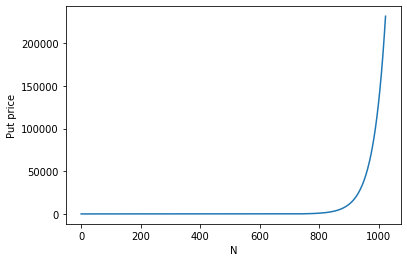

In [ ]:
# Plotting the results
plt.plot(fft_put)
#plt.plot([analytic_putprice]*50)
plt.xlabel("N")
plt.ylabel("Put price")

Text(0, 0.5, 'Log absolute error')

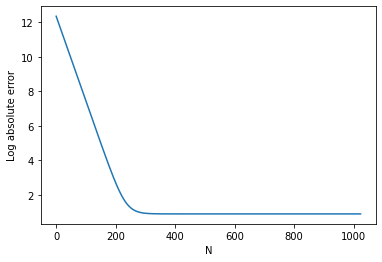

In [ ]:
# Plotting the Log absolute error
plt.plot(np.log(np.absolute(fft_put+analytic_putprice)))
plt.xlabel("N")
plt.ylabel("Log absolute error")

###Bibliography

Martin Baxter and Andrew Rennie, Financial Calculus: An Introduction to Derivative Pricing.

Mark Joshi's, More Mathematical Finance.



Carr, P. and Madan, D. (1999). “Option Valuation Using the Fast Fourier Transform”, Journal of 
Computational Finance 2(4): 61–73.

Cooley, J.W. and Tukey, J.W. (1965). “An Algorithm for the Machine Calculation of Complex 
Fourier Series”, Mathematics of Computation 19(90): 297–301.

Fang, F. (2010). The Cos Method: An Efficient Fourier Method for Pricing Financial Derivatives. 

Hilpisch, Y. (2015). Derivatives analytics with Python: data analysis, models, simulation,
calibration and hedging. John Wiley & Sons.

Rouah, F. D. (2013). The Heston Model and Its Extensions in Matlab and C. John Wiley & Sons.